In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from keras.models import load_model
import numpy as np
from keras import optimizers 
from imutils import face_utils
import cv2
import tensorflow as tf 
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


In [2]:
class yelpImage(object):
    def __init__(self):
        self.target = ['drink','food', 'inside', 'menu', 'outside']
        self.img_width, self.img_height = 48,48
        self.model = load_model(os.getcwd()+'/../models/weights.yelpImage-v0.1.h5')
        self.model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])

    def predict(self, img_path):
        results=[]
        im = cv2.imread(img_path)
        gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        #image_d = cv2.cvtColor(np.array(im))
        resized_img = cv2.resize(gray_image, (self.img_width,self.img_height), interpolation = cv2.INTER_AREA)
        
        image = resized_img.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        #(angry, happy,sad,surprised,neutral,disgust)
        result = self.model.predict(image)[0]
        print(result)
        for (i, r) in enumerate(result):
            print(self.target[i],r)
            if r > 0.5:
                results.append({'class':self.target[i],"proba":r})
        return(results)

In [3]:
yelpimage=yelpImage()

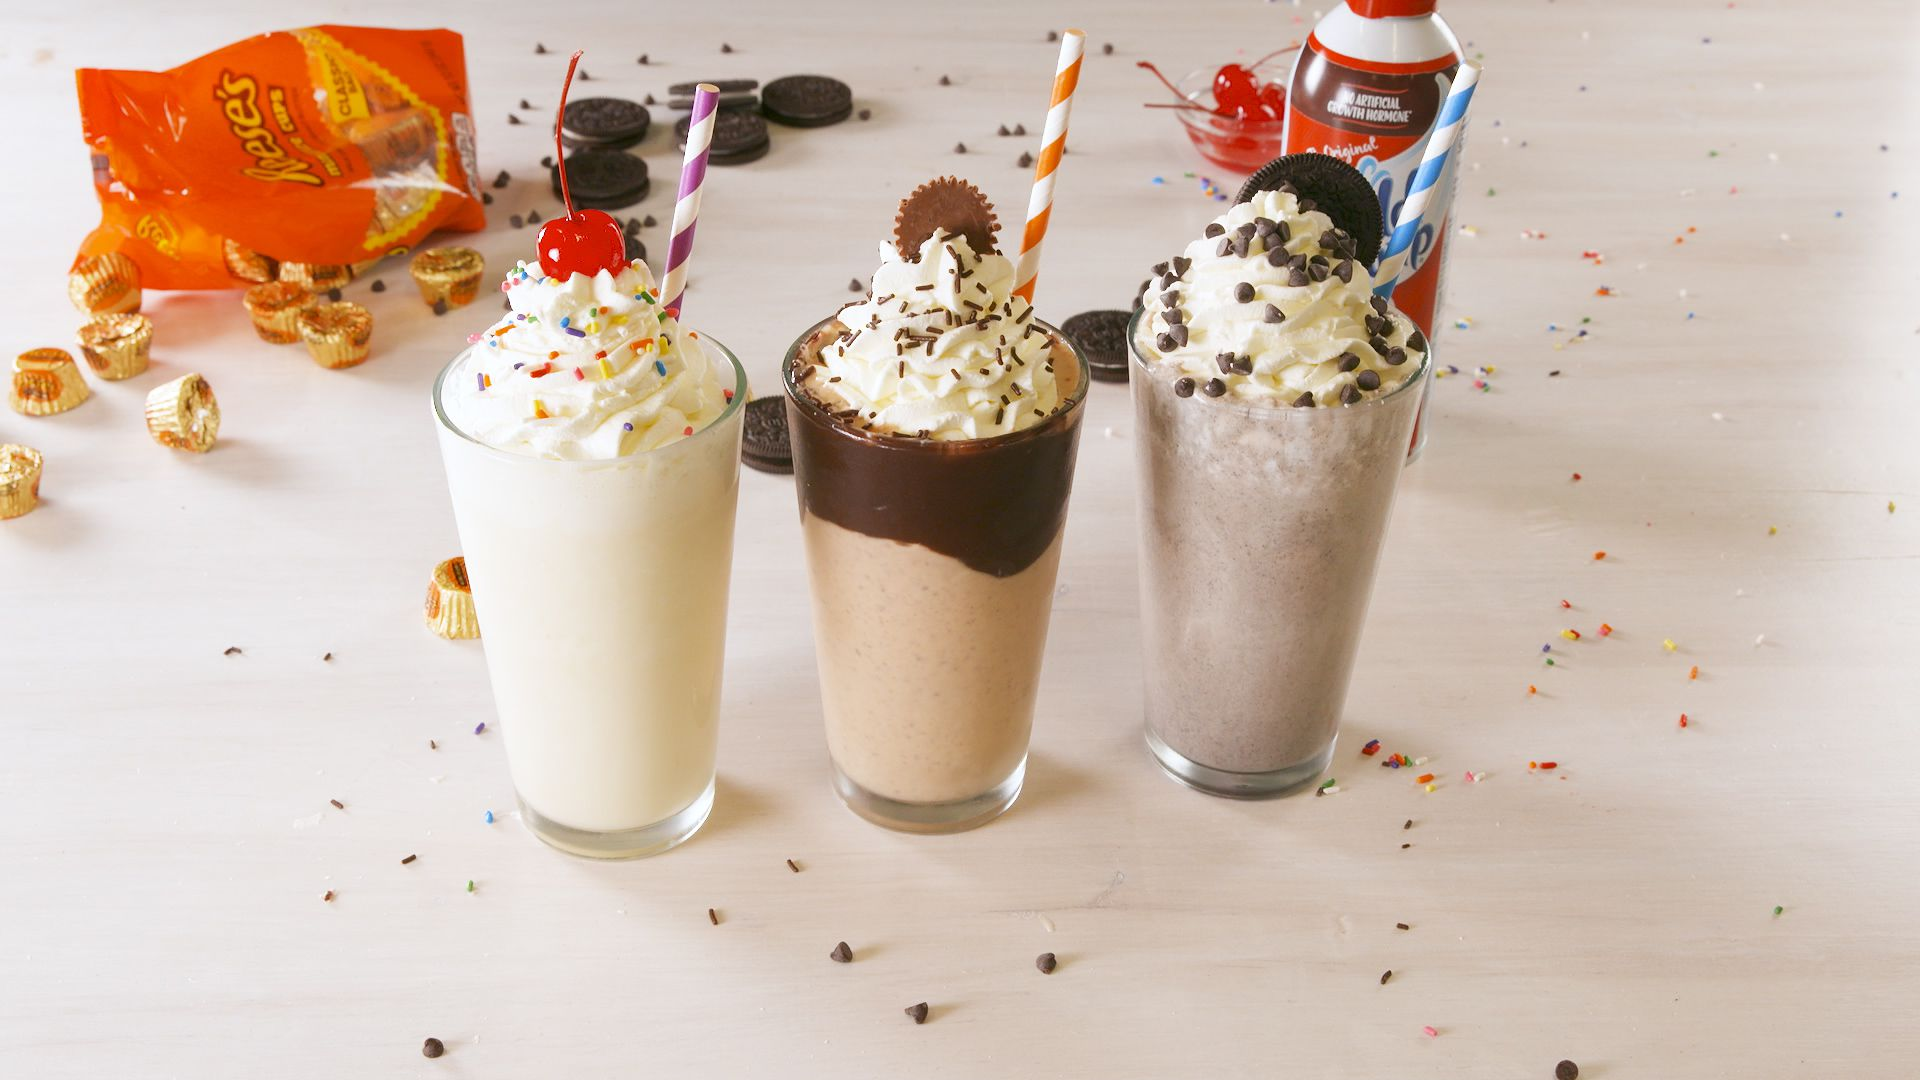

In [4]:
#filer to predict
from IPython.display import Image
Image(filename='test_images/milkshake.jpg') 

In [5]:
print(yelpimage.predict('test_images/milkshake.jpg'))
 

[9.2073178e-01 7.6570138e-02 3.9101364e-05 2.1615336e-03 4.9738627e-04]
drink 0.9207318
food 0.07657014
inside 3.9101364e-05
menu 0.0021615336
outside 0.00049738627
[{'class': 'drink', 'proba': 0.9207318}]
